# 데이터셋 선정

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

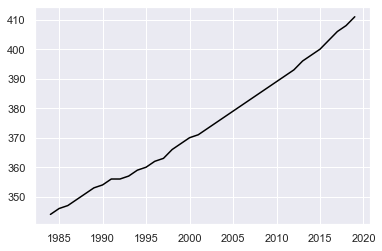

In [2]:
co2 = pd.read_csv("co2_annual_new.csv")
plt.plot(co2['year'], co2['co2_global'], color = 'black')

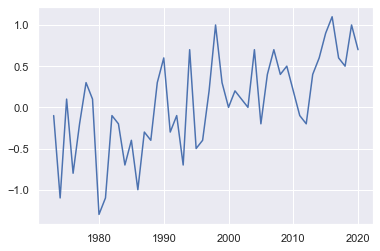

In [3]:
#평균기온 편차
tempy = pd.read_csv("meteo_temp_y_new_domestic.csv")
plt.plot(tempy['year'], tempy['temp'])

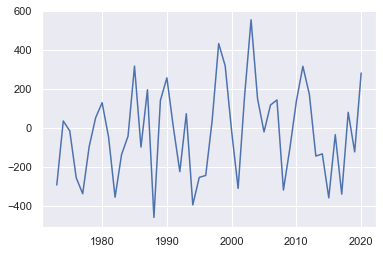

In [4]:
#강수량 연평균 편차
prec = pd.read_csv("meteo_prec_d_new.csv")
plt.plot(prec['year'], prec['precip'])

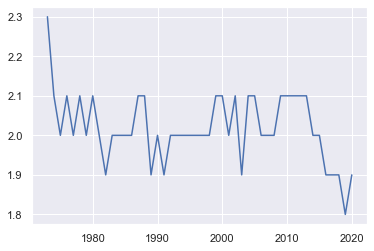

In [5]:
#평균 풍속 연평균
ws = pd.read_csv("ws_y_avg_new.csv")
plt.plot(ws['year'], ws['wind_speed'])

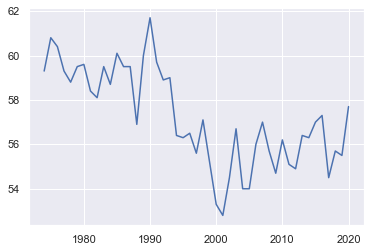

In [6]:
#연평균 실효습도
firey = pd.read_csv("ehfire_y_avg.csv")
plt.plot(firey['year'], firey['effective_humidity'])

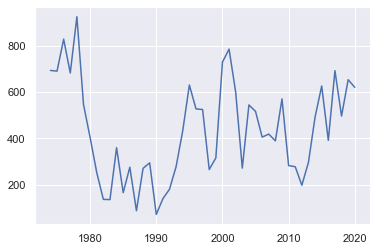

In [7]:
#산불발생 건수
plt.plot(firey['year'], firey['outbreak_cases'])

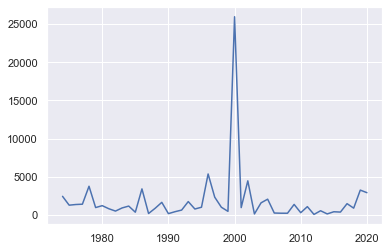

In [8]:
#산불피해 면적
plt.plot(firey['year'], firey['damaged_area'])

In [9]:
data1 = pd.merge(co2, tempy)

In [10]:
data2 = pd.merge(data1, prec)

In [11]:
data3 = pd.merge(data2, ws)

In [12]:
air = pd.merge(data3, firey)
air

,year,co2_global,temp,precip,wind_speed,effective_humidity,outbreak_cases,damaged_area
0,1984,344,-0.7,-43.2,2.0,58.7,359,1164
1,1985,346,-0.4,315.7,2.0,60.1,165,363
2,1986,347,-1.0,-98.8,2.0,59.5,275,3414
3,1987,349,-0.3,194.7,2.1,59.5,87,191
4,1988,351,-0.4,-459.2,2.1,56.9,270,878
5,1989,353,0.3,140.4,1.9,60.0,294,1652
6,1990,354,0.6,255.7,2.0,61.7,71,175
7,1991,356,-0.3,3.0,1.9,59.7,139,429
8,1992,356,-0.1,-224.9,2.0,58.9,180,640
9,1993,357,-0.7,72.0,2.0,59.0,278,1752


# 선형회귀모델 - 산불발생빈도

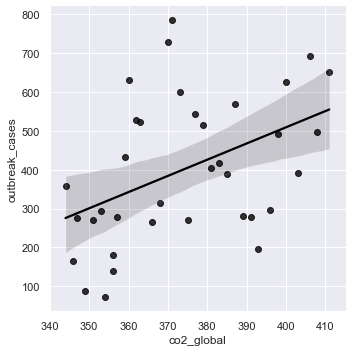

In [13]:
sns.lmplot(x = "co2_global", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

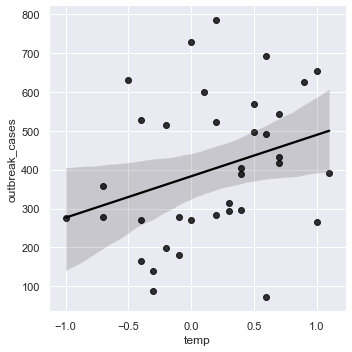

In [14]:
sns.lmplot(x = "temp", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

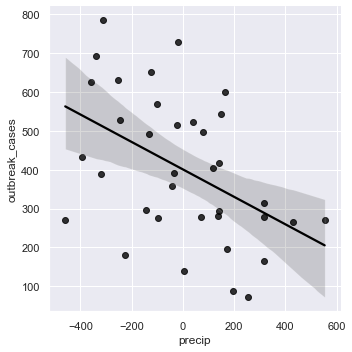

In [15]:
sns.lmplot(x = "precip", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

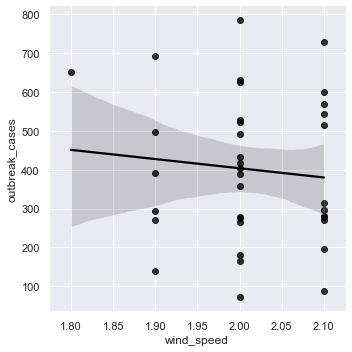

In [16]:
sns.lmplot(x = "wind_speed", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

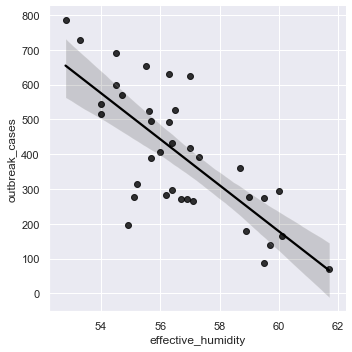

In [17]:
sns.lmplot(x = "effective_humidity", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

이산화탄소 농도와 기온 편차는 산불 발생 빈도와 정비례하였고 강수량과 풍속과 습도는 반비례하였다.

In [18]:
lm_data_air = smf.ols( "outbreak_cases ~ co2_global + temp + precip + wind_speed + effective_humidity",data=air).fit()
lm_data_air.params

Intercept             7185.851416
co2_global              -2.002077
temp                    36.228897
precip                  -0.221768
wind_speed            -809.537970
effective_humidity     -77.944573
dtype: float64

In [19]:
mod_whole = smf.ols("outbreak_cases ~ co2_global + temp + precip + wind_speed + effective_humidity",data=air).fit()
resid_sq_whole = np.sum(mod_whole.resid ** 2)
resid_sq_whole

288786.75537184166

In [20]:
mod_not_co2 = smf.ols("outbreak_cases ~ temp + precip + wind_speed + effective_humidity",data=air).fit()
resid_sq_not_co2 = np.sum(mod_not_co2.resid ** 2)
resid_sq_not_co2

310359.98460215365

In [21]:
mod_not_change = smf.ols("outbreak_cases ~ co2_global + precip + wind_speed + effective_humidity",data=air).fit()
resid_sq_not_change = np.sum(mod_not_change.resid ** 2)
resid_sq_not_change

295959.0164983646

In [22]:
mod_not_prec = smf.ols("outbreak_cases ~ co2_global + temp + wind_speed + effective_humidity",data=air).fit()
resid_sq_not_prec = np.sum(mod_not_prec.resid**2)
resid_sq_not_prec

385838.19417868316

In [23]:
mod_not_ws = smf.ols("outbreak_cases ~ co2_global + temp + precip + effective_humidity",data=air).fit()
resid_sq_not_ws = np.sum(mod_not_ws.resid ** 2)
resid_sq_not_ws

388578.5231863571

In [24]:
mod_not_eff = smf.ols("outbreak_cases ~ co2_global + temp + precip + wind_speed",data=air).fit()
resid_sq_not_eff = np.sum(mod_not_eff.resid ** 2)
resid_sq_not_eff

764832.4973078995

In [25]:
print(sm.stats.anova_lm(mod_whole, typ=2).round(3))

                        sum_sq    df       F  PR(>F)
co2_global           21573.229   1.0   2.241   0.145
temp                  7172.261   1.0   0.745   0.395
precip               97051.439   1.0  10.082   0.003
wind_speed           99791.768   1.0  10.367   0.003
effective_humidity  476045.742   1.0  49.453   0.000
Residual            288786.755  30.0     NaN     NaN


가장 많은 제곱합을 설명하는 요인은 실효습도, 평균 풍속, 강수량 편차, 이산화탄소 농도, 평균기온 편차순이다.

In [26]:
print("모든 변수를 포함한 모델：", mod_whole.aic.round(3))
print("이산화탄소 연평균 농도를 제외한 모델：", mod_not_co2.aic.round(3))
print("전지구 평균기온 편차를 제외한 모델：", mod_not_change.aic.round(3))
print("연강수량 편차를 제외한 모델: ", mod_not_prec.aic.round(3))
print("평균 풍속 연평균을 제외한 모델：", mod_not_ws.aic.round(3))
print("실효습도를 제외한 모델：", mod_not_eff.aic.round(3))

모든 변수를 포함한 모델： 437.801
이산화탄소 연평균 농도를 제외한 모델： 438.394
전지구 평균기온 편차를 제외한 모델： 436.684
연강수량 편차를 제외한 모델:  446.231
평균 풍속 연평균을 제외한 모델： 446.486
실효습도를 제외한 모델： 470.864


In [27]:
null_model = smf.ols( "outbreak_cases ~ 1",  data=air).fit()
lm_model_o1 = smf.ols( "outbreak_cases ~ effective_humidity",  data=air).fit()
lm_model_o2 = smf.ols( "outbreak_cases ~ effective_humidity + precip",  data=air).fit()
lm_model_o3 = smf.ols( "outbreak_cases ~ effective_humidity + precip + wind_speed",  data=air).fit()
lm_model_o4 = smf.ols( "outbreak_cases ~ effective_humidity + precip + wind_speed + co2_global",  data=air).fit()
lm_model_o5 = smf.ols( "outbreak_cases ~ effective_humidity + precip + wind_speed + co2_global + temp",  data=air).fit()

In [28]:
print(null_model.rsquared, null_model.aic)
print(lm_model_o1.rsquared, lm_model_o1.aic)
print(lm_model_o2.rsquared, lm_model_o2.aic)
print(lm_model_o3.rsquared, lm_model_o3.aic)
print(lm_model_o4.rsquared, lm_model_o4.aic)
print(lm_model_o5.rsquared, lm_model_o5.aic)

0.0 479.81054886515113
0.5574370226531333 452.46433875811994
0.6657700397242495 444.3572121777008
0.7465297447448809 436.4002320972971
0.758329693699872 436.68403818030896
0.7641863239989544 437.8008702720567


결정계수는 모델 1에서 크게 증가하고, AIC는 모델 3에서 가장 작다.

In [29]:
lm_data_air.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         outbreak_cases   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     19.44
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.31e-08
Time:                        12:01:33   Log-Likelihood:                -212.90
No. Observations:                  36   AIC:                             437.8
Df Residuals:                      30   BIC:                             447.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7185.8514   1300.966      5.523      0.000    4528.925    9842.778
co2_global            -2.0021      1.337     -1.497      0.145      -4.733       0.729
temp                  36.2289     41.972      0.863      0.395     -49.488     121.946
precip                -0.2218      0.070     -3.175      0.003      -0.364      -0.079
wind_speed          -809.5380    251.430     -3.220      0.003   -1323.027    -296.048
effective_humidity   -77.9446     11.084     -7.032      0.000    -100.581     -55.308
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.584
Skew:                          -0.181   Prob(JB):                        0.747
Kurtosis:                       2.492   Cond. No.                     3.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

유의미한 요인은 강수량 편차와 풍속과 실효습도이다.

In [30]:
lm_model_op = smf.ols( "outbreak_cases ~ precip + wind_speed + effective_humidity",  data = air).fit()
lm_model_op.params

Intercept             5741.720787
precip                  -0.222478
wind_speed            -715.022178
effective_humidity     -68.916878
dtype: float64

In [31]:
lm_model_op.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5741.7208,752.588,7.629,0.000,4208.749,7274.693
precip,-0.2225,0.070,-3.196,0.003,-0.364,-0.081
wind_speed,-715.0222,223.929,-3.193,0.003,-1171.151,-258.893
effective_humidity,-68.9169,8.455,-8.151,0.000,-86.140,-51.694


유의미한 독립변수는 풍속과 실효습도이다.

In [32]:
op = lm_model_op.predict()
air['outbreak_prediction']= op
air.head(5)

,year,co2_global,temp,precip,wind_speed,effective_humidity,outbreak_cases,damaged_area,outbreak_prediction
0,1984,344,-0.7,-43.2,2.0,58.7,359,1164,275.866766
1,1985,346,-0.4,315.7,2.0,60.1,165,363,99.535620
2,1986,347,-1.0,-98.8,2.0,59.5,275,3414,233.103066
3,1987,349,-0.3,194.7,2.1,59.5,87,191,96.303422
4,1988,351,-0.4,-459.2,2.1,56.9,270,878,420.965965


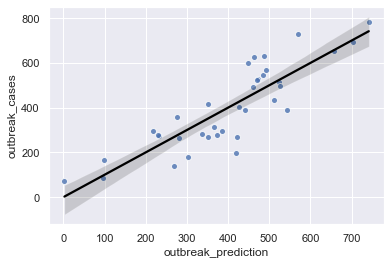

In [33]:
sns.regplot(x = "outbreak_prediction", y = "outbreak_cases", data = air,scatter_kws={'edgecolor':"white"},line_kws = {"color": "black"})

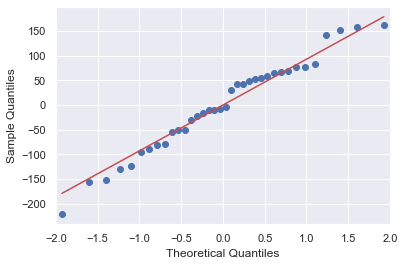

In [34]:
resid1 = lm_model_op.resid
fig = sm.qqplot(resid1, line = "s")

# 선형회귀모델 - 산불 피해 면적

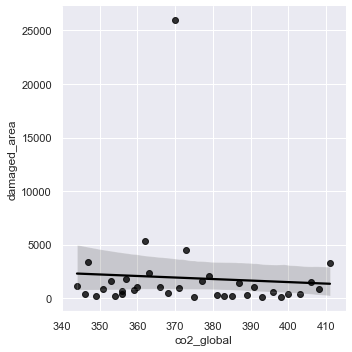

In [35]:
sns.lmplot(x = "co2_global", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

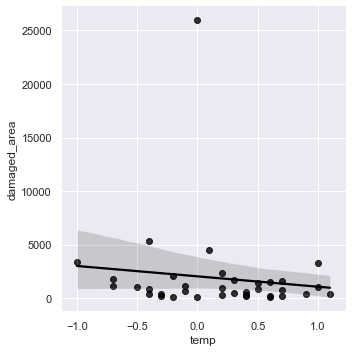

In [36]:
sns.lmplot(x = "temp", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

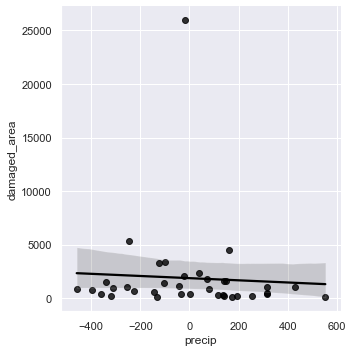

In [37]:
sns.lmplot(x = "precip", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

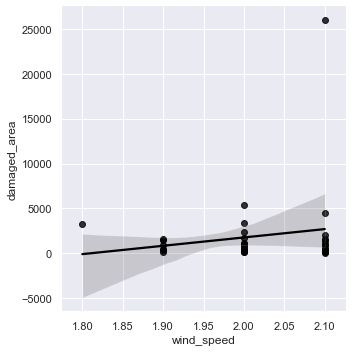

In [38]:
sns.lmplot(x = "wind_speed", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

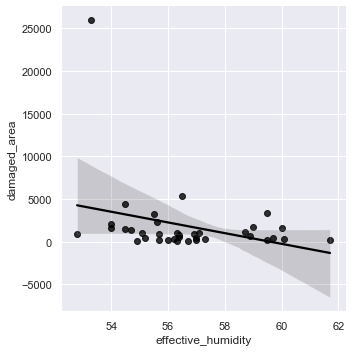

In [39]:
sns.lmplot(x = "effective_humidity", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

In [40]:
lm_data_field = smf.ols("damaged_area ~ co2_global + temp + precip + wind_speed + effective_humidity",data=air).fit()
lm_data_field.params

Intercept             97225.030442
co2_global              -71.440742
temp                   -595.958155
precip                    0.253716
wind_speed            -3466.776806
effective_humidity    -1086.916284
dtype: float64

In [41]:
mod_all = smf.ols( "damaged_area ~ co2_global + temp + precip + wind_speed + effective_humidity",data=air).fit()
resid_sq_all = np.sum(mod_all.resid ** 2)
resid_sq_all

531608050.1804916

In [42]:
mod_non_carbondioxide = smf.ols( "damaged_area ~ temp + precip + wind_speed + effective_humidity",data=air).fit()
resid_sq_non_carbondioxide = np.sum(mod_non_carbondioxide.resid ** 2)
resid_sq_non_carbondioxide

559077214.8534968

In [43]:
mod_non_global = smf.ols( "damaged_area ~ co2_global + precip + wind_speed + effective_humidity",data=air).fit()
resid_sq_non_global = np.sum(mod_non_global.resid ** 2)
resid_sq_non_global

533548835.1193054

In [44]:
mod_non_amount = smf.ols( "damaged_area ~ co2_global + temp + wind_speed + effective_humidity",data=air).fit()
resid_sq_non_amount = np.sum(mod_non_amount.resid ** 2)
resid_sq_non_amount

531735078.49483943

In [45]:
mod_non_wind = smf.ols( "damaged_area ~ co2_global + temp + precip + effective_humidity",data=air).fit()
resid_sq_non_wind = np.sum(mod_non_wind.resid ** 2)
resid_sq_non_wind

533438138.43689835

In [46]:
mod_non_eh = smf.ols( "damaged_area ~ co2_global + temp + precip + wind_speed",data=air).fit()
resid_sq_non_eh = np.sum(mod_non_eh.resid ** 2)
resid_sq_non_eh

624177804.7003142

In [47]:
print(sm.stats.anova_lm(mod_all, typ=2).round(3))

                          sum_sq    df      F  PR(>F)
co2_global          2.746916e+07   1.0  1.550   0.223
temp                1.940785e+06   1.0  0.110   0.743
precip              1.270283e+05   1.0  0.007   0.933
wind_speed          1.830088e+06   1.0  0.103   0.750
effective_humidity  9.256975e+07   1.0  5.224   0.030
Residual            5.316081e+08  30.0    NaN     NaN


가장 많은 제곱합을 설명하는 요인은 실효습도, 이산화탄소 농도, 평균기온 편차, 평균 풍속, 강수량 편차순이다.

In [48]:
print("모든 변수를 포함한 모델：", mod_all.aic.round(3))
print("이산화탄소 연평균 농도를 제외한 모델：", mod_non_carbondioxide.aic.round(3))
print("전지구 평균기온 편차를 제외한 모델：", mod_non_global.aic.round(3))
print("연강수량 편차를 제외한 모델：", mod_non_amount.aic.round(3))
print("평균 풍속 연평균을 제외한 모델：", mod_non_wind.aic.round(3))
print("실효습도를 제외한 모델：", mod_non_eh.aic.round(3))

모든 변수를 포함한 모델： 708.448
이산화탄소 연평균 농도를 제외한 모델： 708.262
전지구 평균기온 편차를 제외한 모델： 706.579
연강수량 편차를 제외한 모델： 706.457
평균 풍속 연평균을 제외한 모델： 706.572
실효습도를 제외한 모델： 712.227


In [49]:
base_model = smf.ols( "damaged_area ~ 1",  data=air).fit()
lm_model_a1 = smf.ols( "damaged_area ~ effective_humidity",  data=air).fit()
lm_model_a2 = smf.ols( "damaged_area ~ effective_humidity + co2_global",  data=air).fit()
lm_model_a3 = smf.ols( "damaged_area ~ effective_humidity + co2_global + temp",  data=air).fit()
lm_model_a4 = smf.ols( "damaged_area ~ effective_humidity + co2_global + temp + wind_speed",  data=air).fit()
lm_model_a5 = smf.ols( "damaged_area ~ effective_humidity + co2_global + temp + wind_speed + precip",  data=air).fit()

In [50]:
print(base_model.rsquared, base_model.aic)
print(lm_model_a1.rsquared, lm_model_a1.aic)
print(lm_model_a2.rsquared, lm_model_a2.aic)
print(lm_model_a3.rsquared, lm_model_a3.aic)
print(lm_model_a4.rsquared, lm_model_a4.aic)
print(lm_model_a5.rsquared, lm_model_a5.aic)

2.220446049250313e-16 705.6792165030477
0.09434213593251806 704.111844104399
0.17702687967170028 702.6652738833557
0.17914233545488434 704.5726165965633
0.1817855593790394 706.4565068251173
0.18198102589116316 708.4479056140597


결정계수는 모델 a1에서 크게 증가하고, AIC는 모델 a2에서 가장 작다.

In [51]:
lm_data_field.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.723e+04,5.58e+04,1.742,0.092,-1.68e+04,2.11e+05
co2_global,-71.4407,57.380,-1.245,0.223,-188.626,45.744
temp,-595.9582,1800.786,-0.331,0.743,-4273.655,3081.738
precip,0.2537,2.997,0.085,0.933,-5.866,6.374
wind_speed,-3466.7768,1.08e+04,-0.321,0.750,-2.55e+04,1.86e+04
effective_humidity,-1086.9163,475.551,-2.286,0.030,-2058.120,-115.712


유의미한 요인은 실효습도이다.

In [52]:
lm_model_5 = smf.ols("damaged_area ~ effective_humidity",data=air).fit()
lm_model_5.params

Intercept             37395.153305
effective_humidity     -627.238200
dtype: float64

In [53]:
lm_model_5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.74e+04,1.89e+04,1.980,0.056,-988.115,7.58e+04
effective_humidity,-627.2382,333.290,-1.882,0.068,-1304.565,50.089


# 결론

습도, 풍속, 강수량은 산불 발생 빈도에 유의미한 영향을 주었고 기온과 이산화탄소 농도는 큰 영향을 주지 못 했다. 

산불 피해면적에서는 유의미한 결과가 나타나지 않았다.

예측을 하는 데 있어서는 만족스러운 결과가 나오지 않았는데 데이터가 연도별로 산정되어 표본의 수가 적었기 때문이다.

독립변수 역시 다양하지 않아 정밀한 예측이 힘들었다.